<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0712_44%EC%9D%BC%EC%B0%A8_AI(iris)%5BKFold%2CStratifiedKfold%2CGridSearchCV%2C%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris_data = load_iris()

In [ ]:
iris_data

In [5]:
dt_clf = DecisionTreeClassifier(random_state =156)

data = iris_data.data       #아이리스 
label = iris_data.target    #정답지
#성능 지표는 정확도 (accuracy) , 교차 검증 세트는 3개

scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 :' , np.round(scores, 4))
print('평균 검증 정확도 :', np.round(np.mean(scores), 4))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667


KFold : 3( 훈련 데이터를 세개로 나눠서 교차해가며 훈련과 검증을 수행하는 것)

3, 5, 7 로 나오게 되는데 

StratifiedKFold : label의 분포를 고려하여 train, test에 나눠주는 역할

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [8]:
iris = load_iris()
features = iris.data
label = iris.target

In [9]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):  #label = iris.target, features= iris.data
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


#GridSearchCV

교차 검증과 최적 하이버 파라미터 튜닝을 한번에 해주는 함수

- estimator = 추정기로 classifier, regressor, pipeline 등 사용

- refit = True가 default임. True 이면 가장 좋은 파라미터 설정으로 재학습 시킴
- cv 가 정수이거나, 입력이 없으면 stratified fold가 사용된다.
- scoring = 성능평가 방법 결정하는 옵션

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
iris.data

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data , iris.target,
                                                    test_size=0.2, random_state=121)

In [14]:
#parameter 들을 dictionary형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}
#max_depth:  트리의 층 깊이를 결정
#min_samples_split : 분할 할 수 있는 샘플 수 의 최소값

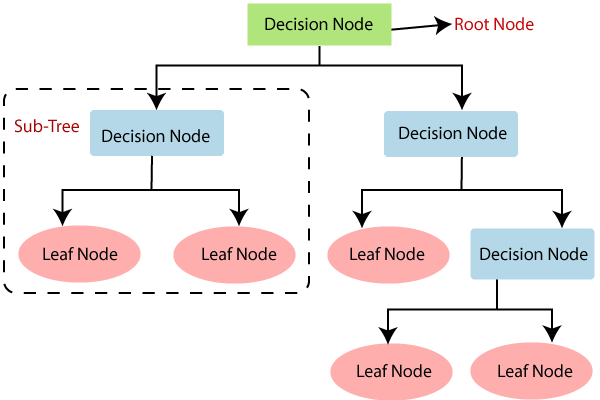

In [15]:
iris.data[:13]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1]])

In [16]:
dtree= DecisionTreeClassifier()

In [17]:
#param_grid의 hyper parameters을 3개의 train, test set fold로 나누어서 테스트 수행 설정.
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

In [18]:
#붓꽃 Train 데이터로 param_grid 의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [19]:
score_df = pd.DataFrame(grid_dtree.cv_results_)

In [20]:
grid_dtree.cv_results_

{'mean_fit_time': array([0.00084074, 0.00039164, 0.0003856 , 0.00035445, 0.00036836,
        0.0003744 ]),
 'mean_score_time': array([0.00076358, 0.00020885, 0.00020234, 0.00019956, 0.00020194,
        0.00020623]),
 'mean_test_score': array([0.7       , 0.7       , 0.95833333, 0.95833333, 0.975     ,
        0.975     ]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_samples_split': 2},
  {'max_depth': 3, 'min_samples_split': 3}],
 'rank_test_score': array([5, 5, 3, 3, 1, 1], 

In [21]:
score_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


GridSearchCV scoring의 default값이 무엇인지 확인해보자

In [22]:
grid_dtree_acc =GridSearchCV(dtree, param_grid=parameters, scoring='accuracy', cv=3, refit=True)
grid_dtree_acc.fit(X_train, y_train)
sdf_acc = pd.DataFrame(grid_dtree_acc.cv_results_)
sdf_acc[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [23]:
grid_dtree.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [24]:
grid_dtree.best_score_

0.975

In [25]:
#GridSearchCV 의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

In [26]:
pred = estimator.predict(X_test)

In [27]:
accuracy_score(y_test, pred)

0.9666666666666667